In [6]:
from ase.spacegroup import crystal
from ase.build import cut, stack
from ase.visualize import view

In [7]:

a_ag = 4.09
ag = crystal(['Ag'], basis=[(0,0,0)], spacegroup=225,
             cellpar=[a_ag, a_ag, a_ag, 90., 90., 90.])
ag110 = cut(ag, (0, 0, 3), (-1.5, 1.5, 0), nlayers=3)
a_si = 5.43
si = crystal(['Si'], basis=[(0,0,0)], spacegroup=227,
             cellpar=[a_si, a_si, a_si, 90., 90., 90.])
si110 = cut(si, (0, 0, 2), (-1, 1, 0), nlayers=3)
interface = stack(ag110, si110, maxstrain=1)
view(interface)


<Popen: returncode: None args: ['/Users/wx/anaconda3/bin/python', '-m', 'ase...>

In [6]:
from ase.io import read, write
from ase.visualize import view
from ase.build import cut, stack
vector_dict = {'100':[[0, 1, 0], [0, 0, 1]], 
               '010':[[0, 0, 1], [1, 0, 0]], 
               '001':[[1, 0, 0], [0, 1, 0]], 
               '110':[[0, 0, 1], [1, -1, 0]], 
               '111':[[1, 0, -1], [0, 1, -1]],
               '211':[[1, -1, -1], [0, 1, -1]]}

In [7]:
from ase.build import make_supercell
a = read('/Users/wx/Desktop/PdO.cif', format='cif')
b = make_supercell(a, [[2,0,0],[0,2,0],[0,0,2]])
# view(b)
a110 = cut(b, vector_dict['111'][0], vector_dict['111'][1], nlayers=10)
# a110.center(vacuum=7.5, axis=2)
view(a110)

FileNotFoundError: [Errno 2] No such file or directory: '/Users/wx/Desktop/PdO.cif'

In [43]:
import numpy as np
import pandas as pd
import csv
# a = pd.read_csv('example/pca/function.data')
num_list = []
with open('example/pca/function.data', 'r') as file:
    csv_1 = csv.reader(file, delimiter='\t')
    for row in csv_1:
        num = sum(len(cell) for cell in row)
        num_list.append(num)
np.savetxt('d.txt', np.array(num_list))


In [46]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from ase.io import read, write
from pynep.calculate import NEP

a = read('/Users/wx/Desktop/train.xyz', ':')
calc = NEP('/Users/wx/Desktop/nep.txt')
print(calc)

NEP 4 calculator with 2 symbols: Ru Si 
------------------------------
  zbl                 : False
  radial_cutoff       : 8.0
  angular_cutoff      : 4.0
  n_max_radial        : 12
  n_max_angular       : 12
  basis_size_radial   : 12
  basis_size_angular  : 12
  l_max_3body         : 4
  num_node            : 78
  num_para            : 14153
  element_list        : ['Ru', 'Si']
------------------------------
Use the NEP4 potential with 2 atom types.
    type 0( Ru with Z = 44).
    type 1( Si with Z = 14).
    radial cutoff = 8 A.
    angular cutoff = 4 A.
    n_max_radial = 12.
    n_max_angular = 12.
    basis_size_radial = 12.
    basis_size_angular = 12.
    l_max_3body = 4.
    l_max_4body = 2.
    l_max_5body = 0.
    ANN = 78-80-1.
    number of neural network parameters = 12801.
    number of descriptor parameters = 1352.
    total number of parameters = 14153.



In [60]:
# des = np.array([np.mean(calc.get_property('descriptor', i), axis=0) for i in a])
des1 = np.array(calc.get_property('descriptor', a[8]))
es = np.array(np.mean(calc.get_property('descriptor', a[8]), axis=0))
des1.shape
# np.savetxt('fp-nep1.txt', des)

(63, 78)

In [68]:
a = 'new.lmp'
len(a)

7

In [11]:
from ase.io import read
import copy
a = read('/Users/wx/Desktop/POSCAR')
new_cell = copy.deepcopy(a)
print(new_cell)
ru = a.symbols.indices()['Ru']
del new_cell[ru]
new_cell.center(vacuum=0)
num = new_cell.get_global_number_of_atoms()
na = 6.02 * 10**23

v = new_cell.get_volume()
dens = ((num / na) * 28.0855 ) / (v * 10**-24)
print(dens)
# si = a.symbols.indices()['Si']

Atoms(symbols='Ru1554Si1699', pbc=True, cell=[56.0, 30.0, 30.0])
2.5949597027691573


In [19]:
def recur(n: int) -> str:
    """递归"""
    # 终止条件
    if n == 1:
        return 1
    # 递：递归调用
    res = recur(n - 1)
    # 归：返回结果
    return n + res
recur(1000)

int

In [2]:
from ase.visualize import view
from ase.build import sort
from ase.cluster.cubic import FaceCenteredCubic
from ase.cluster import Icosahedron, Decahedron, Octahedron, wulff_construction 
# a = FaceCenteredCubic('Cu', [(1,0,0),(1,1,0),(1,1,1)], layers=[6,9,5], latticeconstant=3.61)
b = Decahedron(symbol='Cu', p=10, q=10, r=0, latticeconstant=3.61)
c = Decahedron(symbol='Cu', p=1, q=1, r=6, latticeconstant=3.61)
n = len(c)
b.symbols[:n] = 'Ag'
b = sort(b)
view(b)

<Popen: returncode: None args: ['/Users/wx/anaconda3/bin/python', '-m', 'ase...>

In [24]:
d = Octahedron(symbol='Cu',length=7, cutoff=2)
result = []
for i, coord in enumerate(d.get_positions()):
    print(np.abs(coord[0]) + np.abs(coord[1]) + np.abs(coord[2]) )
    if np.abs(coord[0]) + np.abs(coord[1]) + np.abs(coord[2]) < 3.61/2 * (7-2):
    # if np.abs(coord[0])**2 + np.abs(coord[1])**2 + np.abs(coord[2])**2 <= (3.61 *2 / np.sqrt(2))**2 :
        result.append(i)
d.symbols[result] = 'Ag'
view(d)

10.83
10.829999999999998
10.83
10.83
10.83
10.829999999999998
10.830000000000002
7.22
10.83
10.83
10.83
10.83
7.22
10.83
7.22
10.830000000000002
7.220000000000001
7.220000000000001
10.83
10.83
10.830000000000002
10.83
10.83
10.830000000000002
10.83
10.83
10.829999999999998
10.83
10.83
10.830000000000002
10.829999999999998
7.22
10.83
10.829999999999998
10.829999999999998
10.829999999999998
10.83
7.219999999999999
7.219999999999999
7.219999999999999
7.22
7.22
7.22
3.6099999999999994
10.83
10.829999999999998
10.829999999999998
7.22
10.829999999999998
10.83
10.830000000000002
7.22
10.83
7.22
7.220000000000001
3.6099999999999994
7.220000000000001
3.61
7.2200000000000015
3.6100000000000003
3.6100000000000003
7.220000000000001
10.830000000000002
7.22
7.220000000000001
10.83
10.83
10.83
10.83
10.83
7.22
10.83
7.220000000000001
10.830000000000002
7.220000000000001
7.22
10.830000000000002
10.83
10.83
10.829999999999998
10.83
10.829999999999998
10.83
10.83
7.22
10.83
10.83
7.22
7.220000000000001


<Popen: returncode: None args: ['/Users/wx/anaconda3/bin/python', '-m', 'ase...>

In [18]:
import numpy as np
d = Octahedron(symbol='Cu',length=7, cutoff=2)
result = []
for i, coord in enumerate(d.get_positions()):
    if (np.abs(coord[0]) + np.abs(coord[1]) + np.abs(coord[2]) <= 3.61/2 * (7-2)  and 
    np.abs(coord[0]) <= 3.61*2 -0.001 and 
    np.abs(coord[1]) <= 3.61*2 -0.001 and
    np.abs(coord[2]) <= 3.61*2 -0.001):    
    # if np.abs(coord[0])**2 + np.abs(coord[1])**2 + np.abs(coord[2])**2 <= (3.6 * 1/ np.sqrt(2))**2 :
        result.append(i)
d.symbols[result] = 'Ag'
view(d)

<Popen: returncode: None args: ['/Users/wx/anaconda3/bin/python', '-m', 'ase...>

In [57]:
import numpy as np

def find_subset_ids(subset, superset):
    subset_array = np.array(subset)
    superset_array = np.array(superset)
    
    subset_ids = np.where((subset_array[:, None] == superset_array).all(-1))[1]
    
    return subset_ids.tolist()

# 两个二维数组
subset = [[1, 2], [3, 4]]
superset = [[5, 6], [1, 2], [3, 4], [7, 8]]

result = find_subset_ids(e1, d1)
print(result)

[19, 39, 49, 53]


In [25]:
def tail_recur(n, res):
    """尾递归"""
    # 终止条件
    if n == 0:
        return res
    # 尾递归调用
    return tail_recur(n - 1, res + n)
tail_recur(1000, 0)

500500

Use the NEP4 potential with 2 atom types.
    type 0( Ru with Z = 44).
    type 1( Si with Z = 14).
    radial cutoff = 6 A.
    angular cutoff = 6 A.
    n_max_radial = 8.
    n_max_angular = 8.
    basis_size_radial = 8.
    basis_size_angular = 8.
    l_max_3body = 4.
    l_max_4body = 2.
    l_max_5body = 0.
    ANN = 54-80-1.
    number of neural network parameters = 8961.
    number of descriptor parameters = 648.
    total number of parameters = 9609.


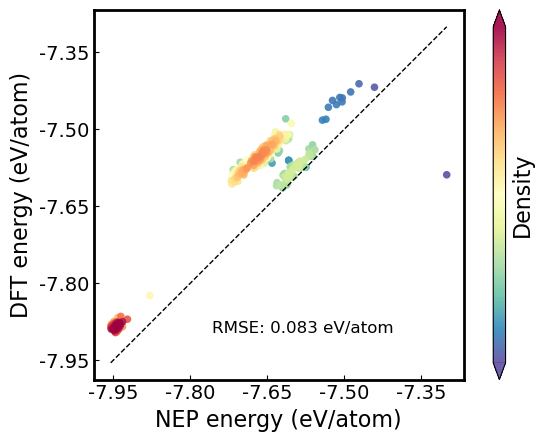

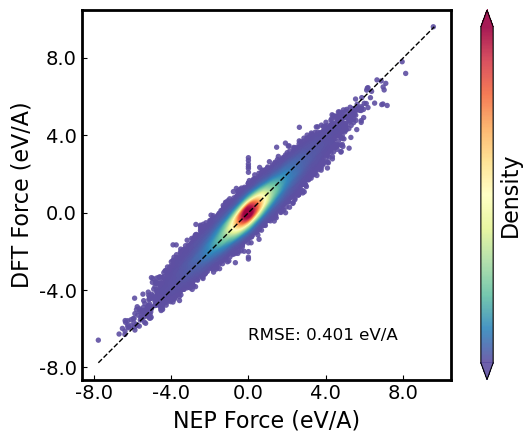

In [8]:
from pynep.calculate import NEP
from ase.io import read
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import random

matplotlib.rcParams['xtick.direction'] = 'in'
matplotlib.rcParams['ytick.direction'] = 'in' # in, out or inout
matplotlib.rcParams['ytick.right'] = False
matplotlib.rcParams['xtick.top'] = False

# --------------------------------------

dft_file = '/Users/wx/Desktop/test.extxyz'
nep_file = '/Users/wx/Desktop/test.extxyz'

# --------------------------------------


s_dft = read(dft_file, ':')
s_nep = read(nep_file, ':')

calc = NEP("/Users/wx/Desktop/potential-rusi/nep0620-1.txt")
# print(calc)
e_dft, e_nep, f_dft, f_nep = [], [], [], []
for i, j in zip(s_dft, s_nep):
    j.set_calculator(calc)
    e_dft.append(i.get_potential_energy() / len(i))
    e_nep.append(j.get_potential_energy() / len(i))

    f_dft.append(i.get_forces().reshape(-1))
    f_nep.append(j.get_forces().reshape(-1))

e_dft = np.array(e_dft)
e_nep = np.array(e_nep)
f_dft = np.concatenate(f_dft)
f_nep = np.concatenate(f_nep)


def pltForce(fT, fP, npltdata=100000):

    if len(fT) > npltdata:
        tmpidex = random.sample(range(len(fT)), npltdata)
        y_test = fT[tmpidex]
        y_prediction = fP[tmpidex]
    else:
        y_test = fT
        y_prediction = fP
    
    ### calculate gaussian_kde
    from scipy.stats import gaussian_kde
    #import matplotlib.cm as cm
    xy = np.vstack([y_test, y_prediction])
    z = gaussian_kde(xy)(xy)
    idex = np.lexsort([z])
    fig,ax=plt.subplots()

    # plt.title("NEP forces vs DFT forces", fontsize=16)
    ax.set_aspect(1)
    xmajorLocator = ticker.MaxNLocator(5)
    ymajorLocator = ticker.MaxNLocator(5)
    ax.xaxis.set_major_locator(xmajorLocator)
    ax.yaxis.set_major_locator(ymajorLocator)
    
    ymajorFormatter = ticker.FormatStrFormatter('%.1f') 
    xmajorFormatter = ticker.FormatStrFormatter('%.1f') 
    ax.xaxis.set_major_formatter(xmajorFormatter)
    ax.yaxis.set_major_formatter(ymajorFormatter)
    
    ax.spines['bottom'].set_linewidth(2)
    ax.spines['left'].set_linewidth(2)
    ax.spines['right'].set_linewidth(2)
    ax.spines['top'].set_linewidth(2)

    ax.tick_params(labelsize=14)

    lowLimit = np.min([np.min(y_test), np.min(y_prediction)])
    highLimit = np.max([np.max(y_test), np.max(y_prediction)])

    ax.plot([lowLimit, highLimit], [lowLimit, highLimit], 'k--', linewidth=1.0)
    scatter = ax.scatter(y_test[idex], y_prediction[idex], c=z[idex], cmap='Spectral_r',alpha=0.9, edgecolor='none', s=15)
    
    ax.set_xlim(np.min(y_test), np.max(y_test))
    ax.set_ylim(np.min(y_prediction), np.max(y_prediction))

    font3 = {'family':'sans-serif','size':16,'color':'k'}

    cbar = plt.colorbar(scatter,shrink=1,orientation='vertical',extend='both',pad=0.015,aspect=30)
    cbar.set_ticks([])
    cbar.update_ticks()
    cbar.set_label('Density',fontdict=font3)

    plt.ylabel("DFT Force (eV/A)",fontdict=font3)
    plt.xlabel("NEP Force (eV/A)",fontdict=font3)
    ax.axis('equal')
    ax.axis('square')

    rmse = np.sqrt(np.mean((y_test-y_prediction)**2))
    plt.text(np.mean(y_test), 
             np.min(y_prediction),
             "RMSE: {:.3f} eV/A".format(rmse), fontsize=12)


def pltEng(eT, eP, npltdata=100000):

    # eT = eT - np.mean(eT)
    # eP = eP - np.mean(eP)

    if len(eT) > npltdata:
        tmpidex = random.sample(range(len(eT)), npltdata)
        y_test = eT[tmpidex]
        y_prediction = eP[tmpidex]
    else:
        y_test = eT
        y_prediction = eP

    # calculate gaussian_kde
    from scipy.stats import gaussian_kde
    #import matplotlib.cm as cm
    xy = np.vstack([y_test, y_prediction])
    z = gaussian_kde(xy)(xy)
    idex = np.lexsort([z])
    fig,ax=plt.subplots()

    # plt.title("NEP energys vs DFT energy", fontsize=16)
    ax.set_aspect(1)
    xmajorLocator = ticker.MaxNLocator(5)
    ymajorLocator = ticker.MaxNLocator(5)
    ax.xaxis.set_major_locator(xmajorLocator)
    ax.yaxis.set_major_locator(ymajorLocator)
    
    ymajorFormatter = ticker.FormatStrFormatter('%.2f') 
    xmajorFormatter = ticker.FormatStrFormatter('%.2f') 
    ax.xaxis.set_major_formatter(xmajorFormatter)
    ax.yaxis.set_major_formatter(ymajorFormatter)
    
    ax.spines['bottom'].set_linewidth(2)
    ax.spines['left'].set_linewidth(2)
    ax.spines['right'].set_linewidth(2)
    ax.spines['top'].set_linewidth(2)

    ax.tick_params(labelsize=14)

    lowLimit = np.min([np.min(y_test), np.min(y_prediction)])
    highLimit = np.max([np.max(y_test), np.max(y_prediction)])

    ax.plot([lowLimit, highLimit], [lowLimit, highLimit], 'k--', linewidth=1.0)
    scatter = ax.scatter(y_test[idex], y_prediction[idex], c=z[idex], cmap='Spectral_r', alpha=0.9, edgecolor='none', s=30)
    
    ax.set_xlim(np.min(y_test), np.max(y_test))
    ax.set_ylim(np.min(y_prediction), np.max(y_prediction))

    font3 = {'family':'sans-serif','size':16,'color':'k'}
    cbar = plt.colorbar(scatter,shrink=1,orientation='vertical',extend='both',pad=0.015,aspect=30)
    cbar.set_ticks([])
    cbar.update_ticks()
    cbar.set_label('Density',fontdict=font3)
    
    plt.ylabel("DFT energy (eV/atom)",fontdict=font3)
    plt.xlabel("NEP energy (eV/atom)",fontdict=font3)
    ax.axis('equal')
    ax.axis('square')

    rmse = np.sqrt(np.mean((y_test-y_prediction)**2))
    plt.text(np.mean(y_test), 
             np.min(y_prediction),
             "RMSE: {:.3f} eV/atom".format(rmse), fontsize=12)
    
    # figname = 'eng.TvsP.square.NEP'+'.png'
    # fig.savefig(figname, format='png', bbox_inches='tight', transparent=True, dpi=600)

pltEng(e_nep, e_dft)
pltForce(f_nep, f_dft)

Use the NEP4 potential with 2 atom types.
    type 0( Ru with Z = 44).
    type 1( Si with Z = 14).
    radial cutoff = 6 A.
    angular cutoff = 4 A.
    n_max_radial = 8.
    n_max_angular = 8.
    basis_size_radial = 8.
    basis_size_angular = 8.
    l_max_3body = 4.
    l_max_4body = 2.
    l_max_5body = 0.
    ANN = 54-80-1.
    number of neural network parameters = 8961.
    number of descriptor parameters = 648.
    total number of parameters = 9609.


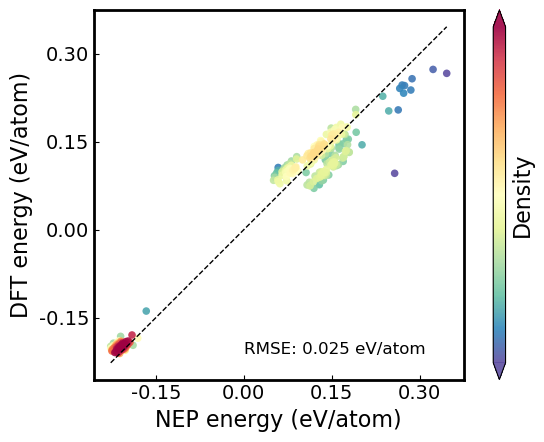

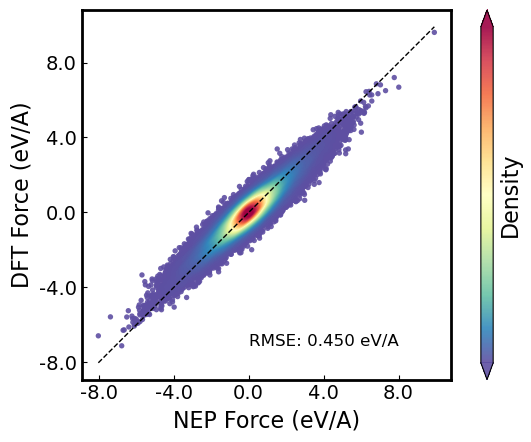

In [150]:
from pynep.calculate import NEP
from ase.io import read
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import random

matplotlib.rcParams['xtick.direction'] = 'in'
matplotlib.rcParams['ytick.direction'] = 'in' # in, out or inout
matplotlib.rcParams['ytick.right'] = False
matplotlib.rcParams['xtick.top'] = False

# --------------------------------------

dft_file = '/Users/wx/Desktop/test.extxyz'
nep_file = '/Users/wx/Desktop/test.extxyz'

# --------------------------------------


s_dft = read(dft_file, ':')
s_nep = read(nep_file, ':')

calc = NEP("/Users/wx/Desktop/potential-rusi/nep0620-2.txt")
# print(calc)
e_dft, e_nep, f_dft, f_nep = [], [], [], []
for i, j in zip(s_dft, s_nep):
    j.set_calculator(calc)
    e_dft.append(i.get_potential_energy() / len(i))
    e_nep.append(j.get_potential_energy() / len(i))

    f_dft.append(i.get_forces().reshape(-1))
    f_nep.append(j.get_forces().reshape(-1))

e_dft = np.array(e_dft)
e_nep = np.array(e_nep)
f_dft = np.concatenate(f_dft)
f_nep = np.concatenate(f_nep)


def pltForce(fT, fP, npltdata=100000):

    if len(fT) > npltdata:
        tmpidex = random.sample(range(len(fT)), npltdata)
        y_test = fT[tmpidex]
        y_prediction = fP[tmpidex]
    else:
        y_test = fT
        y_prediction = fP
    
    ### calculate gaussian_kde
    from scipy.stats import gaussian_kde
    #import matplotlib.cm as cm
    xy = np.vstack([y_test, y_prediction])
    z = gaussian_kde(xy)(xy)
    idex = np.lexsort([z])
    fig,ax=plt.subplots()

    # plt.title("NEP forces vs DFT forces", fontsize=16)
    ax.set_aspect(1)
    xmajorLocator = ticker.MaxNLocator(5)
    ymajorLocator = ticker.MaxNLocator(5)
    ax.xaxis.set_major_locator(xmajorLocator)
    ax.yaxis.set_major_locator(ymajorLocator)
    
    ymajorFormatter = ticker.FormatStrFormatter('%.1f') 
    xmajorFormatter = ticker.FormatStrFormatter('%.1f') 
    ax.xaxis.set_major_formatter(xmajorFormatter)
    ax.yaxis.set_major_formatter(ymajorFormatter)
    
    ax.spines['bottom'].set_linewidth(2)
    ax.spines['left'].set_linewidth(2)
    ax.spines['right'].set_linewidth(2)
    ax.spines['top'].set_linewidth(2)

    ax.tick_params(labelsize=14)

    lowLimit = np.min([np.min(y_test), np.min(y_prediction)])
    highLimit = np.max([np.max(y_test), np.max(y_prediction)])

    ax.plot([lowLimit, highLimit], [lowLimit, highLimit], 'k--', linewidth=1.0)
    scatter = ax.scatter(y_test[idex], y_prediction[idex], c=z[idex], cmap='Spectral_r',alpha=0.9, edgecolor='none', s=15)
    
    ax.set_xlim(np.min(y_test), np.max(y_test))
    ax.set_ylim(np.min(y_prediction), np.max(y_prediction))

    font3 = {'family':'sans-serif','size':16,'color':'k'}

    cbar = plt.colorbar(scatter,shrink=1,orientation='vertical',extend='both',pad=0.015,aspect=30)
    cbar.set_ticks([])
    cbar.update_ticks()
    cbar.set_label('Density',fontdict=font3)

    plt.ylabel("DFT Force (eV/A)",fontdict=font3)
    plt.xlabel("NEP Force (eV/A)",fontdict=font3)
    ax.axis('equal')
    ax.axis('square')

    rmse = np.sqrt(np.mean((y_test-y_prediction)**2))
    plt.text(np.mean(y_test), 
             np.min(y_prediction),
             "RMSE: {:.3f} eV/A".format(rmse), fontsize=12)


def pltEng(eT, eP, npltdata=100000):

    # eT = eT - np.mean(eT)
    # eP = eP - np.mean(eP)

    if len(eT) > npltdata:
        tmpidex = random.sample(range(len(eT)), npltdata)
        y_test = eT[tmpidex]
        y_prediction = eP[tmpidex]
    else:
        y_test = eT
        y_prediction = eP

    # calculate gaussian_kde
    from scipy.stats import gaussian_kde
    #import matplotlib.cm as cm
    xy = np.vstack([y_test, y_prediction])
    z = gaussian_kde(xy)(xy)
    idex = np.lexsort([z])
    fig,ax=plt.subplots()

    # plt.title("NEP energys vs DFT energy", fontsize=16)
    ax.set_aspect(1)
    xmajorLocator = ticker.MaxNLocator(5)
    ymajorLocator = ticker.MaxNLocator(5)
    ax.xaxis.set_major_locator(xmajorLocator)
    ax.yaxis.set_major_locator(ymajorLocator)
    
    ymajorFormatter = ticker.FormatStrFormatter('%.2f') 
    xmajorFormatter = ticker.FormatStrFormatter('%.2f') 
    ax.xaxis.set_major_formatter(xmajorFormatter)
    ax.yaxis.set_major_formatter(ymajorFormatter)
    
    ax.spines['bottom'].set_linewidth(2)
    ax.spines['left'].set_linewidth(2)
    ax.spines['right'].set_linewidth(2)
    ax.spines['top'].set_linewidth(2)

    ax.tick_params(labelsize=14)

    lowLimit = np.min([np.min(y_test), np.min(y_prediction)])
    highLimit = np.max([np.max(y_test), np.max(y_prediction)])

    ax.plot([lowLimit, highLimit], [lowLimit, highLimit], 'k--', linewidth=1.0)
    scatter = ax.scatter(y_test[idex], y_prediction[idex], c=z[idex], cmap='Spectral_r', alpha=0.9, edgecolor='none', s=30)
    
    ax.set_xlim(np.min(y_test), np.max(y_test))
    ax.set_ylim(np.min(y_prediction), np.max(y_prediction))

    font3 = {'family':'sans-serif','size':16,'color':'k'}
    cbar = plt.colorbar(scatter,shrink=1,orientation='vertical',extend='both',pad=0.015,aspect=30)
    cbar.set_ticks([])
    cbar.update_ticks()
    cbar.set_label('Density',fontdict=font3)
    
    plt.ylabel("DFT energy (eV/atom)",fontdict=font3)
    plt.xlabel("NEP energy (eV/atom)",fontdict=font3)
    ax.axis('equal')
    ax.axis('square')

    rmse = np.sqrt(np.mean((y_test-y_prediction)**2))
    plt.text(np.mean(y_test), 
             np.min(y_prediction),
             "RMSE: {:.3f} eV/atom".format(rmse), fontsize=12)
    
    # figname = 'eng.TvsP.square.NEP'+'.png'
    # fig.savefig(figname, format='png', bbox_inches='tight', transparent=True, dpi=600)

pltEng(e_nep, e_dft)
pltForce(f_nep, f_dft)

Use the NEP4 potential with 2 atom types.
    type 0( Ru with Z = 44).
    type 1( Si with Z = 14).
    radial cutoff = 6 A.
    angular cutoff = 6 A.
    n_max_radial = 8.
    n_max_angular = 8.
    basis_size_radial = 8.
    basis_size_angular = 8.
    l_max_3body = 4.
    l_max_4body = 2.
    l_max_5body = 0.
    ANN = 54-80-1.
    number of neural network parameters = 8961.
    number of descriptor parameters = 648.
    total number of parameters = 9609.


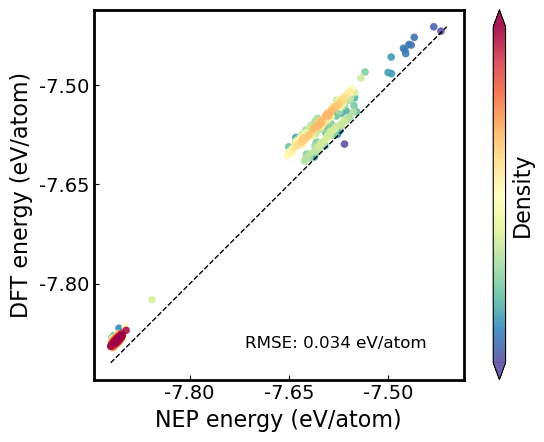

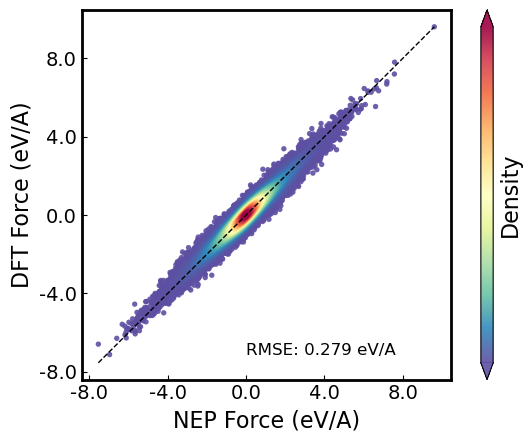

In [4]:
from pynep.calculate import NEP
from ase.io import read
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import random

matplotlib.rcParams['xtick.direction'] = 'in'
matplotlib.rcParams['ytick.direction'] = 'in' # in, out or inout
matplotlib.rcParams['ytick.right'] = False
matplotlib.rcParams['xtick.top'] = False

# --------------------------------------

dft_file = '/Users/wx/Desktop/test.extxyz'
nep_file = '/Users/wx/Desktop/test.extxyz'

# --------------------------------------


s_dft = read(dft_file, ':')
s_nep = read(nep_file, ':')

calc = NEP("/Users/wx/Desktop/potential-rusi/nep0620-3.txt")
# print(calc)
e_dft, e_nep, f_dft, f_nep = [], [], [], []
for i, j in zip(s_dft, s_nep):
    j.set_calculator(calc)
    e_dft.append(i.get_potential_energy() / len(i))
    e_nep.append(j.get_potential_energy() / len(i))

    f_dft.append(i.get_forces().reshape(-1))
    f_nep.append(j.get_forces().reshape(-1))

e_dft = np.array(e_dft)
e_nep = np.array(e_nep)
f_dft = np.concatenate(f_dft)
f_nep = np.concatenate(f_nep)


def pltForce(fT, fP, npltdata=100000):

    if len(fT) > npltdata:
        tmpidex = random.sample(range(len(fT)), npltdata)
        y_test = fT[tmpidex]
        y_prediction = fP[tmpidex]
    else:
        y_test = fT
        y_prediction = fP
    
    ### calculate gaussian_kde
    from scipy.stats import gaussian_kde
    #import matplotlib.cm as cm
    xy = np.vstack([y_test, y_prediction])
    z = gaussian_kde(xy)(xy)
    idex = np.lexsort([z])
    fig,ax=plt.subplots()

    # plt.title("NEP forces vs DFT forces", fontsize=16)
    ax.set_aspect(1)
    xmajorLocator = ticker.MaxNLocator(5)
    ymajorLocator = ticker.MaxNLocator(5)
    ax.xaxis.set_major_locator(xmajorLocator)
    ax.yaxis.set_major_locator(ymajorLocator)
    
    ymajorFormatter = ticker.FormatStrFormatter('%.1f') 
    xmajorFormatter = ticker.FormatStrFormatter('%.1f') 
    ax.xaxis.set_major_formatter(xmajorFormatter)
    ax.yaxis.set_major_formatter(ymajorFormatter)
    
    ax.spines['bottom'].set_linewidth(2)
    ax.spines['left'].set_linewidth(2)
    ax.spines['right'].set_linewidth(2)
    ax.spines['top'].set_linewidth(2)

    ax.tick_params(labelsize=14)

    lowLimit = np.min([np.min(y_test), np.min(y_prediction)])
    highLimit = np.max([np.max(y_test), np.max(y_prediction)])

    ax.plot([lowLimit, highLimit], [lowLimit, highLimit], 'k--', linewidth=1.0)
    scatter = ax.scatter(y_test[idex], y_prediction[idex], c=z[idex], cmap='Spectral_r',alpha=0.9, edgecolor='none', s=15)
    
    ax.set_xlim(np.min(y_test), np.max(y_test))
    ax.set_ylim(np.min(y_prediction), np.max(y_prediction))

    font3 = {'family':'sans-serif','size':16,'color':'k'}

    cbar = plt.colorbar(scatter,shrink=1,orientation='vertical',extend='both',pad=0.015,aspect=30)
    cbar.set_ticks([])
    cbar.update_ticks()
    cbar.set_label('Density',fontdict=font3)

    plt.ylabel("DFT Force (eV/A)",fontdict=font3)
    plt.xlabel("NEP Force (eV/A)",fontdict=font3)
    ax.axis('equal')
    ax.axis('square')

    rmse = np.sqrt(np.mean((y_test-y_prediction)**2))
    plt.text(np.mean(y_test), 
             np.min(y_prediction),
             "RMSE: {:.3f} eV/A".format(rmse), fontsize=12)


def pltEng(eT, eP, npltdata=100000):

    # eT = eT - np.mean(eT)
    # eP = eP - np.mean(eP)

    if len(eT) > npltdata:
        tmpidex = random.sample(range(len(eT)), npltdata)
        y_test = eT[tmpidex]
        y_prediction = eP[tmpidex]
    else:
        y_test = eT
        y_prediction = eP

    # calculate gaussian_kde
    from scipy.stats import gaussian_kde
    #import matplotlib.cm as cm
    xy = np.vstack([y_test, y_prediction])
    z = gaussian_kde(xy)(xy)
    idex = np.lexsort([z])
    fig,ax=plt.subplots()

    # plt.title("NEP energys vs DFT energy", fontsize=16)
    ax.set_aspect(1)
    xmajorLocator = ticker.MaxNLocator(5)
    ymajorLocator = ticker.MaxNLocator(5)
    ax.xaxis.set_major_locator(xmajorLocator)
    ax.yaxis.set_major_locator(ymajorLocator)
    
    ymajorFormatter = ticker.FormatStrFormatter('%.2f') 
    xmajorFormatter = ticker.FormatStrFormatter('%.2f') 
    ax.xaxis.set_major_formatter(xmajorFormatter)
    ax.yaxis.set_major_formatter(ymajorFormatter)
    
    ax.spines['bottom'].set_linewidth(2)
    ax.spines['left'].set_linewidth(2)
    ax.spines['right'].set_linewidth(2)
    ax.spines['top'].set_linewidth(2)

    ax.tick_params(labelsize=14)

    lowLimit = np.min([np.min(y_test), np.min(y_prediction)])
    highLimit = np.max([np.max(y_test), np.max(y_prediction)])

    ax.plot([lowLimit, highLimit], [lowLimit, highLimit], 'k--', linewidth=1.0)
    scatter = ax.scatter(y_test[idex], y_prediction[idex], c=z[idex], cmap='Spectral_r', alpha=0.9, edgecolor='none', s=30)
    
    ax.set_xlim(np.min(y_test), np.max(y_test))
    ax.set_ylim(np.min(y_prediction), np.max(y_prediction))

    font3 = {'family':'sans-serif','size':16,'color':'k'}
    cbar = plt.colorbar(scatter,shrink=1,orientation='vertical',extend='both',pad=0.015,aspect=30)
    cbar.set_ticks([])
    cbar.update_ticks()
    cbar.set_label('Density',fontdict=font3)
    
    plt.ylabel("DFT energy (eV/atom)",fontdict=font3)
    plt.xlabel("NEP energy (eV/atom)",fontdict=font3)
    ax.axis('equal')
    ax.axis('square')

    rmse = np.sqrt(np.mean((y_test-y_prediction)**2))
    plt.text(np.mean(y_test), 
             np.min(y_prediction),
             "RMSE: {:.3f} eV/atom".format(rmse), fontsize=12)
    
    # figname = 'eng.TvsP.square.NEP'+'.png'
    # fig.savefig(figname, format='png', bbox_inches='tight', transparent=True, dpi=600)

pltEng(e_nep, e_dft)
pltForce(f_nep, f_dft)

In [3]:
from pynep.calculate import NEP
from ase.io import read
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import random

matplotlib.rcParams['xtick.direction'] = 'in'
matplotlib.rcParams['ytick.direction'] = 'in' # in, out or inout
matplotlib.rcParams['ytick.right'] = False
matplotlib.rcParams['xtick.top'] = False

# --------------------------------------

dft_file = '/Users/wx/Desktop/test.extxyz'
nep_file = '/Users/wx/Desktop/test.extxyz'

# --------------------------------------


s_dft = read(dft_file, ':')
s_nep = read(nep_file, ':')

calc = NEP("/Users/wx/Desktop/potential-rusi/nep0620-3.txt")
# print(calc)
e_dft, e_nep, f_dft, f_nep = [], [], [], []
for i, j in zip(s_dft, s_nep):
    j.set_calculator(calc)
    e_dft.append(i.get_potential_energy() / len(i))
    e_nep.append(j.get_potential_energy() / len(i))

    f_dft.append(i.get_forces().reshape(-1))
    f_nep.append(j.get_forces().reshape(-1))

e_dft = np.array(e_dft)
e_nep = np.array(e_nep)
f_dft = np.concatenate(f_dft)
f_nep = np.concatenate(f_nep)
np.savetxt('/Users/wx/Desktop/new.out', np.column_stack((e_dft, e_nep)))

Use the NEP4 potential with 2 atom types.
    type 0( Ru with Z = 44).
    type 1( Si with Z = 14).
    radial cutoff = 6 A.
    angular cutoff = 6 A.
    n_max_radial = 8.
    n_max_angular = 8.
    basis_size_radial = 8.
    basis_size_angular = 8.
    l_max_3body = 4.
    l_max_4body = 2.
    l_max_5body = 0.
    ANN = 54-80-1.
    number of neural network parameters = 8961.
    number of descriptor parameters = 648.
    total number of parameters = 9609.


In [19]:
from ase.build import molecule
from ase.neighborlist import NeighborList
atoms = molecule("CO")
nl = NeighborList([0.76, 0.66], self_interaction=False)
nl.update(atoms)
indices, offsets = nl.get_neighbors(0)
print(indices)
print(offsets)



[1]
[[0 0 0]]


In [84]:
from ase.build import bulk
from ase.neighborlist import NewPrimitiveNeighborList
atoms = bulk('Cu', 'fcc', a=3.61, cubic=False)
view(atoms)
nl = NewPrimitiveNeighborList([2.3], skin=0, self_interaction=False, sorted=True, bothways=True)


nl.update(atoms.pbc, atoms.get_cell(), atoms.positions)
indices, offsets = nl.get_neighbors(0)
print(indices)
print(len(indices))
print(offsets)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0]
42
[[ 0  1  1]
 [ 0  1 -2]
 [ 1  0 -2]
 [ 0  2 -1]
 [-1  2 -1]
 [ 1  1 -1]
 [ 2 -1  0]
 [ 1 -1  0]
 [ 0 -1  0]
 [-1 -1  0]
 [ 0  1 -1]
 [ 1 -2  0]
 [-1  1 -1]
 [ 2  0 -1]
 [ 1  0 -1]
 [ 0  0 -1]
 [-1  0 -1]
 [ 2 -1 -1]
 [ 1  1 -2]
 [-1  0  0]
 [ 1  0  0]
 [-1 -1  2]
 [-1  1  1]
 [-2  1  1]
 [ 1  0  1]
 [ 0  0  1]
 [-1  0  1]
 [-2  0  1]
 [ 1 -1  1]
 [ 0 -1  1]
 [ 0 -1 -1]
 [-1  2  0]
 [ 0  1  0]
 [-1  1  0]
 [-2  1  0]
 [-1 -1  1]
 [ 1 -2  1]
 [ 0 -2  1]
 [-1  0  2]
 [ 0 -1  2]
 [ 1  1  0]
 [ 1 -1 -1]]


In [96]:
de = [(13, 24), ('NF', 'NF'), ('NF', 'NF')]
de = np.array(de)
if 'NF' in de:
    asds = np.argwhere(de =='NF')
    print(asds)
    
print(de)
de[1][0] = 43
print(de)

[[1 0]
 [1 1]
 [2 0]
 [2 1]]


/var/folders/dv/8dwm31ws64l5xj4rqb5bsxtr0000gn/T/ipykernel_14197/123302014.py:65: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


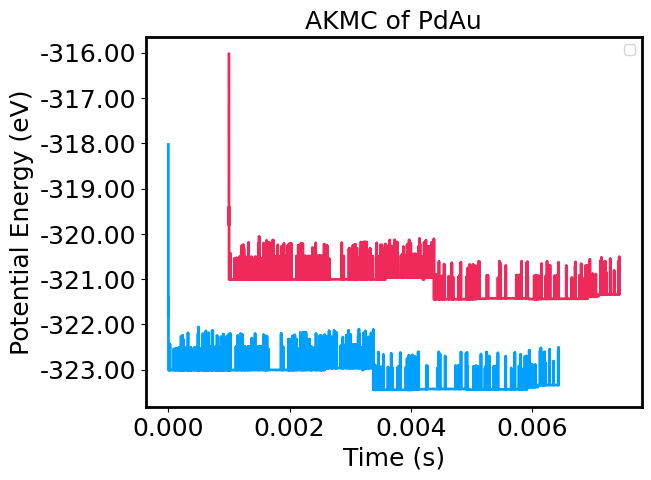

In [91]:
'''
Author: glab-cabage 2227541807@qq.com
Date: 2024-05-28 16:36:34
LastEditors: glab-cabage 2227541807@qq.com
LastEditTime: 2024-07-22 17:13:54
FilePath: /tools-for-mlp-in-atomic-simulation/test.ipynb
Description: 这是默认设置,请设置`customMade`, 打开koroFileHeader查看配置 进行设置: https://github.com/OBKoro1/koro1FileHeader/wiki/%E9%85%8D%E7%BD%AE
'''
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.ticker import MultipleLocator

a = pd.read_csv('/Users/wx/Desktop/dynamics2.csv')
x = a.iloc[:, 0]
y = a.iloc[:, 1]
x1 = [x, x+0.001]
y1 = [y, y+2]

def font_dict(family, size, color, weight):
    font3 = {'family':family,'size':size,'color':color, 'weight':weight}
    return font3
def plot_Polyline(x, y, title, labelx, labely, 
                  weight='normal', size=18, nfloat=[3,2], bins=[0.002, 1],
                  linecolor='b', linewidth=2, legend='line',
                  mlt=False, save_fig=True, savedir='/Users/wx/Desktop/polt.png'):
    fig, ax = plt.subplots()
    font3 = font_dict('sans-serif', size, 'black', weight)
    if mlt:
        for i in range(len(x)):
            ax.plot(x[i], y[i], color=linecolor[i], linewidth=linewidth)
            ax.legend(legend)
    else:
        ax.plot(x, y, color=linecolor, linewidth=linewidth)
    # 设置长宽比
    # ax.set_aspect(1)
    # 设置主要刻度定位器
    xmajorLocator = ticker.MaxNLocator(5)
    ymajorLocator = ticker.MaxNLocator(5)
    ax.xaxis.set_major_locator(xmajorLocator)
    ax.yaxis.set_major_locator(ymajorLocator)
    # 设置主要刻度间隔
    ax.xaxis.set_major_locator(MultipleLocator(bins[0])) 
    ax.yaxis.set_major_locator(MultipleLocator(bins[1]))
    # 设置主要刻度格式化器 
    xmajorFormatter = ticker.FormatStrFormatter(f'%.{nfloat[0]}f') 
    ymajorFormatter = ticker.FormatStrFormatter(f'%.{nfloat[1]}f')
    ax.xaxis.set_major_formatter(xmajorFormatter)
    ax.yaxis.set_major_formatter(ymajorFormatter)
    # 设置坐标轴边框的线宽
    ax.spines['bottom'].set_linewidth(linewidth)
    ax.spines['left'].set_linewidth(linewidth)
    ax.spines['right'].set_linewidth(linewidth)
    ax.spines['top'].set_linewidth(linewidth)
    # 设置刻度标签的字体大小
    # 添加标题和图例
    ax.tick_params(labelsize=size)
    for label in ax.get_xticklabels() + ax.get_yticklabels():
        label.set_fontweight(font3['weight'])
    ax.set_title(f"{title}", fontdict=font3)
    ax.set_xlabel(f"{labelx}", fontdict=font3)
    ax.set_ylabel(f"{labely}", fontdict=font3)
    ax.legend()
    if save_fig==True:
        plt.savefig(savedir, dpi=300, bbox_inches='tight')
    else:
        plt.show()
    
plot_Polyline(x1, y1, 'AKMC of PdAu', 'Time (s)', 'Potential Energy (eV)', linecolor=['#00A0FF', '#EF295A'], mlt=True)

2
2
2


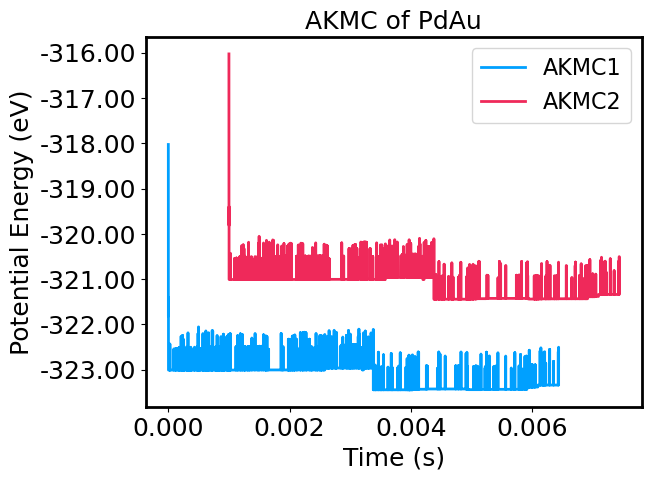

In [3]:
import pandas as pd
from Plottools.plotfig import plot_Polyline
a = pd.read_csv('/Users/wx/Desktop/dynamics2.csv')
x = a.iloc[:, 0]
y = a.iloc[:, 1]
x1 = [x, x+0.001]
y1 = [y, y+2]
print(len(x1))
print(len(y1))
lc = ['#00A0FF', '#EF295A']
print(len(lc))
# plot_Polyline(x1, y1, 'AKMC of PdAu', 'Time (s)', 'Potential Energy (eV)', linecolor=['#00A0FF', '#EF295A', '#FFAA00'], mlt=True)

plot_Polyline(x1, y1, 'AKMC of PdAu', 'Time (s)', 'Potential Energy (eV)', linecolor=lc, mlt=True, legend=['AKMC1','AKMC2'])


2
2


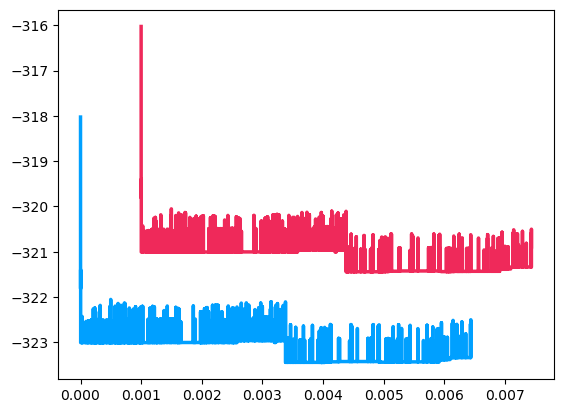

In [85]:
a = pd.read_csv('/Users/wx/Desktop/dynamics2.csv')
x = a.iloc[:, 0]
y = a.iloc[:, 1]
x1 = [x, x+0.001]
y1 = [y, y+2]
linecolor = ['#00A0FF', '#EF295A']
linewidth = 2.5
print(len(x1))
print(len(y1))
fig, ax = plt.subplots()

# 确保循环时颜色的索引正确
for i in range(len(x1)):
    ax.plot(x1[i], y1[i], color=linecolor[i], linewidth=linewidth)

In [7]:
import numpy as np
print(np.pi)
R1, R2, R3 = 1, 2, 3
S1, S2, S3 = [4 * np.pi * np.square(R) for R in [R1,R2,R3]]
print(S1,S2,S3)

3.141592653589793
12.566370614359172 50.26548245743669 113.09733552923255


In [34]:
import torch
import itertools
import numpy as np
from ase.io import read

a = read('/Users/wx/Desktop/tools-for-test/work journey/24-0723/Generate-interface-RuSi/test0723.xyz', ':')
pos = torch.tensor(a[0].get_positions())
b = torch.cdist(pos, pos)
c = a[0].symbols.indices()['Ru']
d = a[0].symbols.indices()['Si']
e = list(itertools.combinations(c, 2))
f = list(itertools.combinations(d, 2))
g = list(itertools.product(c, f))



: 

In [35]:
import torch
import itertools
import numpy as np
from ase.io import read
from ase.neighborlist import neighbor_list
a = read('/Users/wx/Desktop/tools-for-test/work journey/24-0723/Generate-interface-RuSi/test0723.xyz', ':')
elements = list(a[0].symbols.species())
all_comb = np.array(np.meshgrid(elements, elements)).T.reshape(-1, 2)
cut_comb = list({tuple(sorted(comb)) for comb in all_comb})
print(cut_comb)
nl = neighbor_list('d', a[0], cutoff={('Si', 'Si'): 6})
print(len(nl))
np.min(nl)

[('Ru', 'Si'), ('Si', 'Si'), ('Ru', 'Ru')]
85192


2.2566896419312976

In [36]:
elements = np.array(['Ru', 'Si'])
combinations = np.array(np.meshgrid(elements, elements)).T.reshape(-1, 3)
print(combinations)
unique_combinations = {tuple(sorted(comb)) for comb in combinations}

print(list(unique_combinations))

ValueError: cannot reshape array of size 8 into shape (3)

In [39]:
e_list = ['Ru', 'Si', 'O']
all_comb = list(itertools.product(e_list, repeat=2))
cut_comb = list({tuple(sorted(comb)) for comb in all_comb})
print(cut_comb)

[('O', 'Ru'), ('Si', 'Si'), ('O', 'Si'), ('Ru', 'Ru'), ('Ru', 'Si'), ('O', 'O')]


In [29]:
import numpy as np
a = np.zeros((2, 3))
b = np.array([1, 2, 3])
d = np.sqrt(np.vdot(b, b))
print(b/d)
a[0] += b/d * 2
a[1] += b/d 
c = np.array([[4.0, 6.0, 7.0], [4.0, 6.0, 7.0]])
print(c.shape)
print(a.shape)
c += a
print(c)

[0.26726124 0.53452248 0.80178373]
(2, 3)
(2, 3)
[[4.53452248 7.06904497 8.60356745]
 [4.26726124 6.53452248 7.80178373]]


In [79]:
from ase.build import bulk
from ase.neighborlist import neighbor_list
a = bulk('Cu', cubic=True)
nl = neighbor_list('d', a, {('Cu','Cu'): 2.554})
print(nl)
print(np.shape(nl))

[2.55265548 2.55265548 2.55265548 2.55265548 2.55265548 2.55265548
 2.55265548 2.55265548 2.55265548 2.55265548 2.55265548 2.55265548
 2.55265548 2.55265548 2.55265548 2.55265548 2.55265548 2.55265548
 2.55265548 2.55265548 2.55265548 2.55265548 2.55265548 2.55265548
 2.55265548 2.55265548 2.55265548 2.55265548 2.55265548 2.55265548
 2.55265548 2.55265548 2.55265548 2.55265548 2.55265548 2.55265548
 2.55265548 2.55265548 2.55265548 2.55265548 2.55265548 2.55265548
 2.55265548 2.55265548 2.55265548 2.55265548 2.55265548 2.55265548]
(48,)


In [90]:
from ase.io import read
a = read('/Users/wx/Desktop/alb.xyz')
print(a.symbols)
nl = neighbor_list('d', a, {('Ni','Ni'): 6})
print(nl)
print(np.shape(nl))

Ni20Au12
[5.01080102 5.80056679 5.69347614 5.90186241 4.62805437 4.03727467
 5.49257474 4.8291128  4.3897611  3.89743706 4.66029935 2.53139403
 5.04290587 5.52148459 5.47212631 5.0844608  5.82774739 3.02243675
 5.15900292 4.10284423 3.92990653 4.78586113 4.56871507 5.79966538
 4.96501432 2.89392663 5.5396673  5.92471715 3.6160837  3.89741926
 4.76693219 2.64209682 5.93826707 5.8308959  4.96501432 3.17667863
 5.28678798 4.17121815 5.57517233 4.70399496 4.73047863 2.57824768
 3.99592572 5.01159891 3.92210652 4.76632379 5.28514018 2.79300525
 4.15329428 3.40536842 3.43307257 4.49412351 5.4217869  4.89514736
 4.03727467 4.13359149 4.93318626 5.01454679 4.84939094 5.92991949
 4.49647458 3.87708279 3.90058971 5.62973772 4.35297    5.75059479
 3.90058971 4.62842404 4.2098977  5.63629824 5.64272834 5.63400959
 4.91030998 4.79089391 4.35548312 5.25979817 5.84240581 2.36207388
 4.92280977 4.74235256 4.56185267 4.28021016 4.7577948  2.8525533
 3.13511419 4.82189343 4.47136315 2.77967904 5.2851401

In [117]:
'''
Author: glab-cabage 2227541807@qq.com
Date: 2024-05-28 16:36:34
LastEditors: glab-cabage 2227541807@qq.com
LastEditTime: 2024-07-26 00:06:11
FilePath: /tools-for-mlp-in-atomic-simulation/test.ipynb
Description: 这是默认设置,请设置`customMade`, 打开koroFileHeader查看配置 进行设置: https://github.com/OBKoro1/koro1FileHeader/wiki/%E9%85%8D%E7%BD%AE
'''
from ase.io import read
import torch
a = read('/Users/wx/Desktop/POSCAR')
pos = torch.tensor(a.get_positions())
al = torch.cdist(pos, pos)
al1 = torch.cdist(pos, pos)
a = al- al1
# print(al)
# print(len(al.reshape(-1)))
# print(a.symbols)
# nl = neighbor_list('d', a, 6)
# print(nl)
# print(np.shape(nl))

0.0

In [122]:
from ase.io import read
a = read('/Users/wx/Desktop/POSCAR1')
print(a.symbols)
nl = neighbor_list('i', a, 6)
print(nl)
print(np.shape(nl))


O26Pd55
[ 0  0  0 ... 80 80 80]
(2142,)


In [121]:
a1 = read('/Users/wx/Desktop/POSCAR2')
print(a1.symbols)
nl1 = neighbor_list('i', a1, 6)
print(nl1)
print(np.shape(nl1))

O26Pt55
[ 0  0  0 ... 80 80 80]
(2866,)


In [123]:
print(len(a1.symbols.species()))

2


In [68]:

cell = a.get_cell()
cell1 = np.linalg.pinv(a.get_cell())
# 定义一个一维数组（向量）
b = 2*np.pi*(np.cross(cell[0], cell[1])/(np.dot(cell[2], np.cross(cell[0], cell[1]))))
print(cell)
print(cell1)
print(b)
print(b/np.sqrt(np.vdot(b, b)))
print(np.linalg.norm(cell1[0]))
print(1/np.linalg.norm(cell1[0]))

Cell([[0.0, 1.805, 1.805], [1.805, 0.0, 1.805], [1.805, 1.805, 0.0]])
[[-0.27700831  0.27700831  0.27700831]
 [ 0.27700831 -0.27700831  0.27700831]
 [ 0.27700831  0.27700831 -0.27700831]]
[ 1.74049454  1.74049454 -1.74049454]
[ 0.57735027  0.57735027 -0.57735027]
0.4797924674706032
2.0842344717745487


In [143]:
# import numpy as np

# def distance_point_to_plane(point, vector_u, vector_v):
#     # 点坐标 P0
#     P0 = np.array(point)

#     # 向量
#     u = np.array(vector_u)
#     v = np.array(vector_v)

#     # 计算法向量 n = u × v
#     n = np.cross(u, v)
#     print(n)

#     # 平面方程的系数
#     A, B, C = n
#     D = -np.dot(n, P0)  # 计算D
#     print(D)
#     # 计算给定点 P0 (x, y, z) 到平面的距离
#     distance = abs(A * P0[0] + B * P0[1] + C * P0[2] + D) / np.linalg.norm(n)

#     return distance

def distance_point_to_plane(point, u, v):
    # 计算法向量
    normal = np.cross(u, v)
    normal = normal / np.linalg.norm(normal)  # 单位化法向量
    
    # 从原点开始，计算平面内一个点
    point_on_plane = np.zeros(3)  # 如果平面通过原点
    # 计算点到平面上的最短距离
    point_vector = point - point_on_plane
    
    # 投影到法向量上的距离
    distance = np.abs(np.dot(normal, point_vector))
    return distance

In [151]:
vec = a.get_cell()
print(vec)
point = a.get_positions()
zmax = np.min(point[:,0])
point_z = point[point[:, 0] == zmax].reshape(-1)
print(point_z)
c1 = distance_point_to_plane(point_z, vec[1], vec[2])
print(c1)

Cell([24.8994, 25.8732, 24.5125])
[ 5.87427 16.32858 15.81056]
5.87427


In [154]:
a =np.array([0, 1, 2])
p = a<2
np.sum(p)

2

In [177]:
a1
ele_dict = a1.symbols.indices()
ele_num = [len(i) for i in list(ele_dict.values())]
print(np.round([(ele_num[i] / len(a1)) for i in range(len(ele_dict))], 3))

[0.321 0.679]


In [194]:
def check_pbc(image, vac=2):
    vec = image.get_cell()
    point = image.get_positions()
    c_min = [np.min(point[:,i]) for i in range(2)]
    print(point[point[:, 0] == c_min[0]])
    point =[point[point[:, i] == c_min[i]].reshape(-1) for i in range(2)]
    id = [[1, 2], [0, 2], [0, 1]]
    dists = []
    for i in range(2):
        dist = distance_point_to_plane(point[i], vec[id[i][0]], vec[id[i][1]])
        dists.append(dist)
    result = np.array(dists) < vac
    return result

def ratio_find(images):
    ratio = np.array([])
    for id, img in enumerate(images):
        symbols = img.symbols.species()
        num = len(symbols)
        if num > 1:
            pbc_ = check_pbc(img)
            if np.sum(pbc_) <= 1:
                ele_dict = img.symbols.indices()
                ele_num = [len(i) for i in list(ele_dict.values())]
                r = np.round([(ele_num[i] / len(img)) for i in range(len(ele_dict))], 3)
                ratio = np.append(ratio, r)
    a = sorted(list(set(ratio)))
    return a
ratio_find([a1])


[[ 7.5        18.60106921 18.02035101]]


[0.321, 0.679]

In [200]:
all_neighbors_temp = neighbor_list('d', a1, 6)
target_all_neighbors = np.copy(all_neighbors_temp)

for j in range(len(all_neighbors_temp)):
    scale_factor = 1.14
    target_all_neighbors[j] = all_neighbors_temp[j] * scale_factor
print(target_all_neighbors)

[4.16915675 6.51016476 6.39285612 ... 6.55902126 4.28498643 6.78527385]


In [201]:
print(all_neighbors_temp)

[3.65715504 5.71067084 5.60776853 ... 5.75352742 3.75876003 5.95199461]


In [73]:
from ase.io import read
import numpy as np
from ase.neighborlist import neighbor_list
from ase.geometry import wrap_positions
a1 = read('/Users/wx/Desktop/POSCAR')
neighbors_bak = all_neighbors, id1, id2, D_v, shift_vectors = neighbor_list('dijDS', a1, 6)
print(len(neighbors_bak[0]))
print(len(all_neighbors))
print(all_neighbors[0])
np.sqrt(np.dot(D_v[0], D_v[0]))

3118
3118
2.8475266119242666


2.8475266119242666

In [61]:
import numpy as np

a = np.arange(start=0.5, stop=6, step=5.5/100)
len(a) 

100

In [6]:
from ase.io import read
import numpy as np
from ase.neighborlist import neighbor_list
from ase.geometry import wrap_positions
a1 = read('/Users/wx/Desktop/POSCAR.data')
neighbors_bak = all_neighbors, id1, id2, D_v, shift_vectors = neighbor_list('dijDS', a1, 6)
print(len(neighbors_bak[0]))
print(len(all_neighbors))
print(all_neighbors)
np.sqrt(np.dot(D_v[0], D_v[0]))

3100
3100
[5.42906039 4.32997868 5.53935147 ... 3.69719591 3.05156658 4.60271504]


5.429060393133814

In [12]:
a2 = read('/Users/wx/Desktop/adjusted_traj/Adjusted.xyz')
neighbors_bak = all_neighbors, id1, id2, D_v, shift_vectors = neighbor_list('dijDS', a2, 6)
print(len(neighbors_bak[0]))
print(len(all_neighbors))
print(all_neighbors)
np.sqrt(np.dot(D_v[0], D_v[0]))

3064
3064
[5.35062459 4.58562935 5.85501963 ... 3.55549102 2.90851261 4.79426679]


5.350624593958905

In [201]:
import pandas as pd
from Plottools import plotfig
a = pd.read_csv('/Users/wx/Desktop/tools-for-test/work journey/24-0729/PMF/out0.1.pmf',skiprows=3,sep='  ')
x = a.iloc[:, 0] /1372 
ids = x[(x >= 2) & (x <= 4)].index
y = a.iloc[:, 1] - a.iloc[:, 1][0]
# x1
idx1 = x[(x >= 3.15) & (x <= 3.2)].index
ymax = np.min(y.loc[idx1])
ymin = np.max(y.loc[idx1])
xid = y[y==ymax].index
xmax = x[xid]
print(xid)

print(ymin)
print(xmax)
print(ymax)


plotfig.plot_Polyline(x.loc[ids], y.loc[ids], title="Metadynamic of RuSi", labelx='Average Coordination Number', labely='ΔG (eV)', 
                  weight='normal', size=18, nfloat=[2,2], bins=[0.4, 5],
                  linecolor='#00A0FF', linewidth=2, legend='line',
                  mlt=False, save_fig=True, savedir='/Users/wx/Desktop/polt.png')

/var/folders/dv/8dwm31ws64l5xj4rqb5bsxtr0000gn/T/ipykernel_71226/4030542530.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  a = pd.read_csv('/Users/wx/Desktop/tools-for-test/work journey/24-0729/PMF/out0.1.pmf',skiprows=3,sep='  ')


FileNotFoundError: [Errno 2] No such file or directory: '/Users/wx/Desktop/tools-for-test/work journey/24-0729/PMF/out0.1.pmf'

In [42]:
import numpy as np
def ratio_find(images):
    ratio = []
    for id, img in enumerate(images):
        symbols = img.symbols.species()
        num = len(symbols)
        if num > 1:
            pbc_ = check_pbc(img)
            if np.sum(pbc_) == 3:
                print(id)
                ele_dict = img.symbols.indices()
                ele_num = [len(i) for i in list(ele_dict.values())]
                r = np.round([(ele_num[i] / len(img)) for i in range(len(ele_dict))], 3).reshape(-1)
                ratio.append(r)
    a = np.unique(ratio, axis=0)
    return a
def check_pbc(image, vac=2):
    vec = image.get_cell()
    point = image.get_positions()
    c_min = [np.min(point[:,i]) for i in range(3)]
    point =[point[point[:, i] == c_min[i]][0].reshape(-1) for i in range(3)]
    id = [[1, 2], [0, 2], [0, 1]]
    dists = []
    for i in range(3):
        dist = distance_point_to_plane(point[i], vec[id[i][0]], vec[id[i][1]])
        dists.append(dist)
    result = np.array(dists) < vac
    return result
def distance_point_to_plane(point, u, v):
    # Calculate the normal vector.
    normal = np.cross(u, v)
    normal = normal / np.linalg.norm(normal)  # Normalization of normal vector.
    

    original_point = np.zeros(3)
    point_vector = point - original_point
    
    # Distance projected onto the normal vector
    distance = np.abs(np.dot(normal, point_vector))
    return distance

In [43]:
from ase.io import read
a = read('/Users/wx/Library/Containers/com.tencent.xinWeChat/Data/Library/Application Support/com.tencent.xinWeChat/2.0b4.0.9/51292bd0cb1e698687c3f2a30d3fe77c/Message/MessageTemp/3d1dc9bfb8f5207eba5916f8c774cca4/File/PdO1818.xyz', ':')

In [44]:
ratio_find(a)

1301
1302
1303
1304
1305
1306
1307
1308
1309
1310
1311
1312
1313
1314
1315
1316
1317
1318
1319
1320
1321
1322
1323
1324
1325
1326
1327
1328
1329
1330
1331
1332
1333
1334
1335
1336
1337
1338
1339
1340
1341
1342
1343
1344
1345
1346
1347
1348
1349
1350
1351
1352
1353
1354
1355
1356
1357
1358
1359
1360
1361
1362
1363
1364
1365
1366
1367
1368
1369
1370
1371
1372
1373
1374
1375
1376
1377
1378
1379
1380
1381
1382
1383
1384
1385
1386
1387
1388
1389
1390
1391
1392
1393
1394
1395
1495
1496
1497
1498
1499
1500
1501
1502
1503
1504
1505
1506
1507
1508
1509
1510
1511
1512
1513
1514
1515
1516
1517
1518
1519
1520
1521
1522
1523
1524
1525
1526
1527
1528
1529
1530
1531
1532
1533
1534
1535
1536
1537
1538
1539
1540
1541
1542
1543
1544
1545
1546
1547
1548
1549
1550
1551
1552
1553
1554
1555
1556
1557
1558
1559
1560
1561
1562
1563
1564
1565
1566
1567
1568
1569
1570
1571
1572
1573
1574
1575
1576
1577
1578
1579
1580
1581
1582
1583
1584
1585
1586
1587
1588
1589
1590
1591
1592
1593
1594
1595
1596
1597
1598
1599


array([[0.5, 0.5]])

In [26]:
for i in range(2):
    print(i)

0
1


In [39]:
import numpy as np
def distance_point_to_plane(point, u, v):
    # Calculate the normal vector.
    normal = np.cross(u, v)
    normal = normal / np.linalg.norm(normal)  # Normalization of normal vector.
    

    original_point = np.zeros(3)
    point_vector = point - original_point
    
    # Distance projected onto the normal vector
    distance = np.abs(np.dot(normal, point_vector))
    return distance

def check_pbc(image, vac=3):
    vec = image.get_cell()
    point = image.get_positions()
    # Min and max value in each direction
    c_min = [np.min(point[:,i]) for i in range(3)]

    
    # Check the distance from point to surface.
    point_min = [point[point[:, i] == c_min[i]][0].reshape(-1) for i in range(3)]
    id = [[1, 2], [0, 2], [0, 1]]
    dists_min = []
    for i in range(3):
        dist_min = distance_point_to_plane(point_min[i], vec[id[i][0]], vec[id[i][1]])
        dists_min.append(dist_min)
    result1 = np.array(dists_min) < vac
    result2 = np.array([np.max(np.diff(sorted(point[:, i]))) for i in range(3)]) < vac
    
    return np.logical_and(result1, result2)


In [27]:
import numpy as np 
from ase.io import read, write
from ase.visualize import view

a = read('/Users/wx/Desktop/pdo_4833.xyz', ':')

lllaaa = a[97].cell.cellpar()
cl = a[97].get_cell()
pos = a[97].get_scaled_positions()
print(lllaaa)
print(cl)
pos[1]

[ 11.15367387  11.15367387  20.99752802  90.          90.
 120.        ]
Cell([[11.15367387, 0.0, 0.0], [-5.576836935, 9.659364917, 0.0], [0.0, 0.0, 20.997528016]])


array([0.30640711, 0.09599078, 0.08650828])

In [41]:
check_pbc(a[97])


(array([0.68815133, 0.6164    , 0.06457   ]),
 array([ 1.32175,  1.13822, 10.55155]))

In [44]:
# 定义两个布尔数组
array1 = np.array([False, False, True])
array2 = np.array([True, True, False])

# 计算交集
intersection = np.logical_and(array1, array2)

# 输出结果
print("交集结果：", intersection)

交集结果： [False False False]


In [3]:
import numpy as np
a = [[0.01,0.04,0.05],[0.03,0.06,0.08],[0.02,0.09,0.07]]
b = np.array(a)
len(b[b<0.05])

4

In [4]:
lower([0.01,0.04,0.05],[0.03,0.06,0.08] )

NameError: name 'lower' is not defined

[0, 0, 0, 0, 0]